## BLACK FRIDAY SALE-REGRESSION MODEL

#### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp

import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### LOADING DATASET

In [3]:
sale=pd.read_csv("C:/Users/DEEPIKA/Downloads/Black friday sale.csv")

In [7]:
sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
sale.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [10]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
sale.shape

(550068, 12)

In [14]:
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#### MISSING VALUE CALCULATION

In [12]:
sale.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [124]:
(sale.isnull().sum()/(len(sale)))*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

#### FILLING MISSING VALUES

In [4]:
mean=sale['Product_Category_2'].mean()
sale['Product_Category_2'].replace(np.nan,mean, inplace=True)

In [5]:
mean=sale['Product_Category_3'].mean()
sale['Product_Category_3'].replace(np.nan,mean, inplace=True)

#### DATA VISUALIZATION

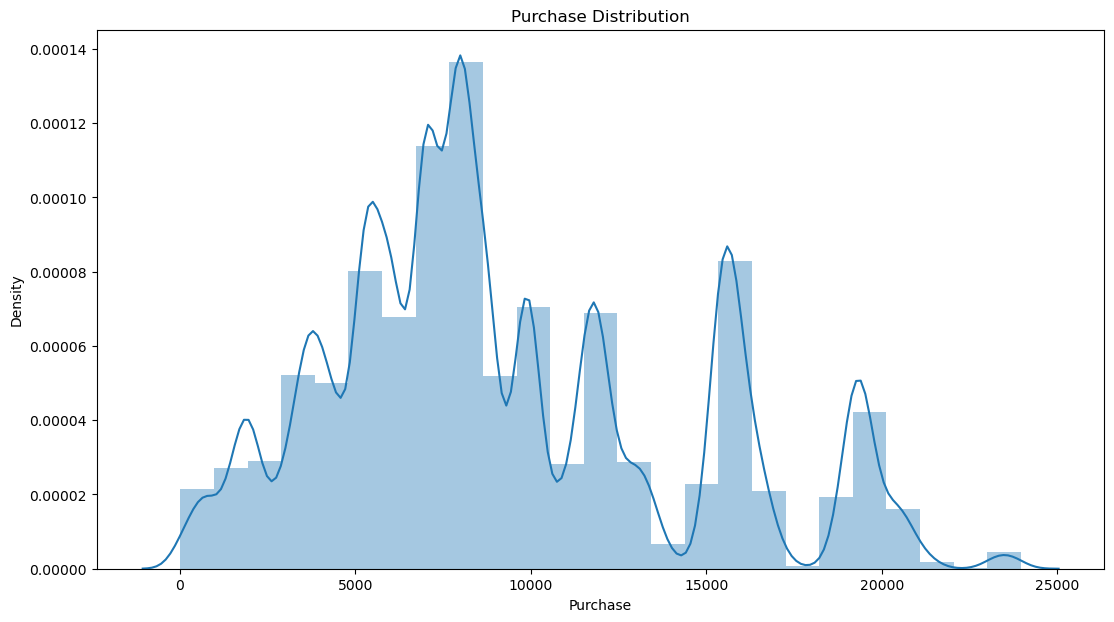

In [21]:
plt.figure(figsize=(13, 7))
sns.distplot(sale['Purchase'], bins=25)
plt.title("Purchase Distribution")
plt.show()

([<matplotlib.patches.Wedge at 0x20a6a861f70>,
 [Text(-0.785367774085001, 0.7701931312526561, 'M'),
  Text(0.7853677019743126, -0.7701932047840901, 'F')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%\n(414259)'),
  Text(0.42838238289507957, -0.42010538442768547, '24.7%\n(135809)')])

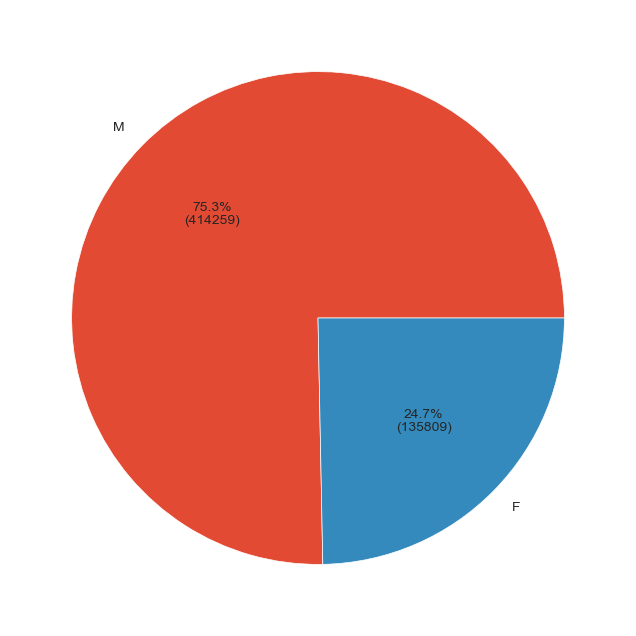

In [182]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = sale['Gender'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

<AxesSubplot:xlabel='Age', ylabel='count'>

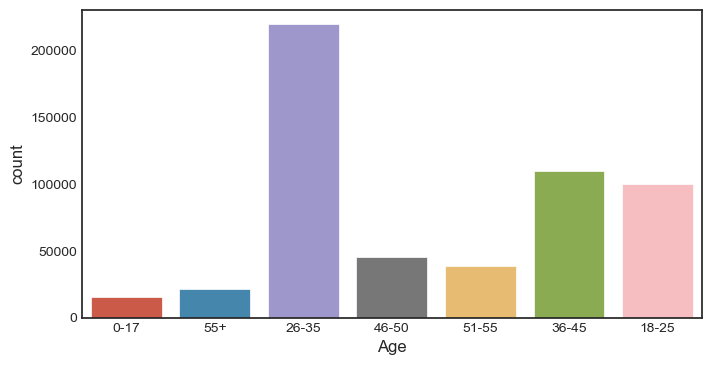

In [136]:
plt.figure(figsize=(8,4))
sns.countplot(sale['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

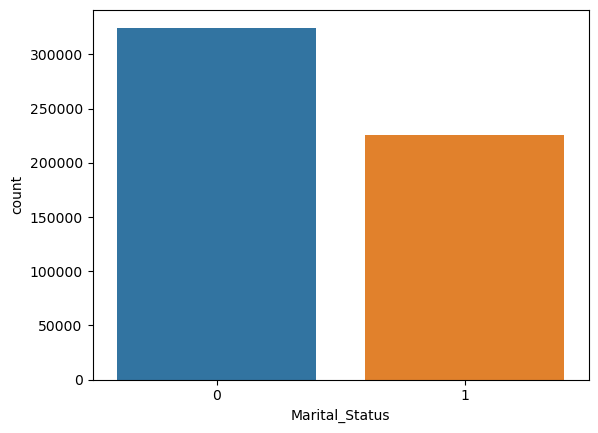

In [25]:
sns.countplot(sale['Marital_Status'])


<AxesSubplot:xlabel='Occupation', ylabel='count'>

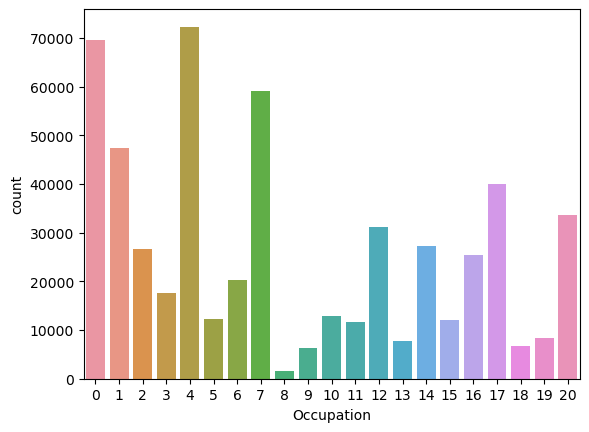

In [26]:
sns.countplot(sale['Occupation'])

([<matplotlib.patches.Wedge at 0x20a6a817760>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.0%\n(231173)'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.1%\n(171175)'),
  Text(0.3988350646218405, -0.4482528206582668, '26.9%\n(147720)')])

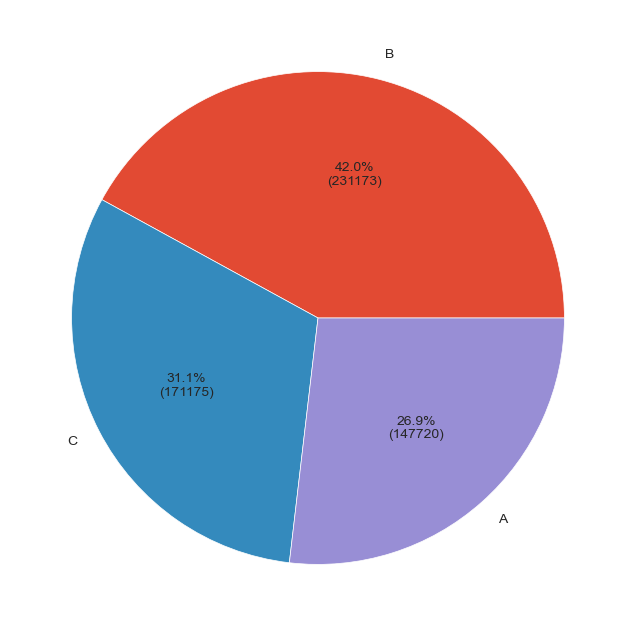

In [181]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = sale['City_Category'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

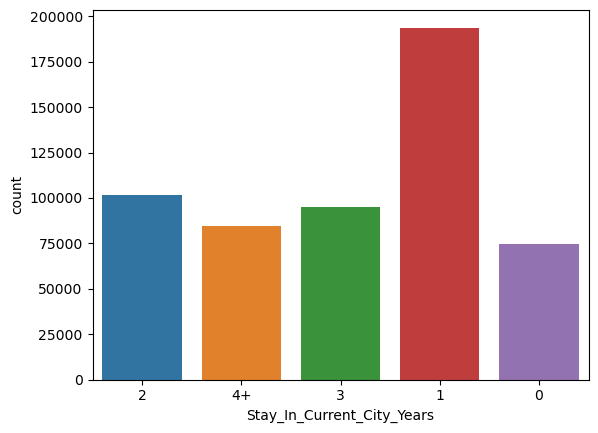

In [28]:
sns.countplot(sale['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

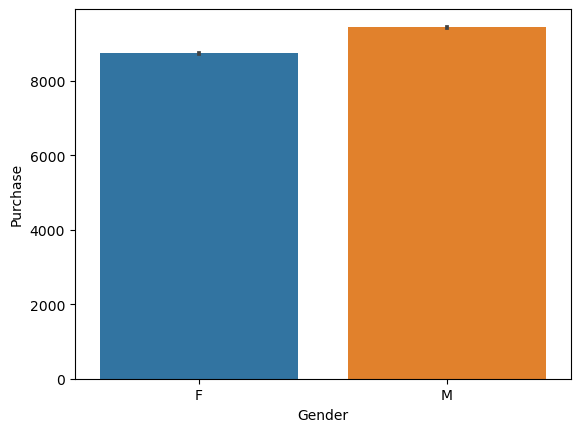

In [33]:
sns.barplot(x='Gender',
               y='Purchase',
               data=sale)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

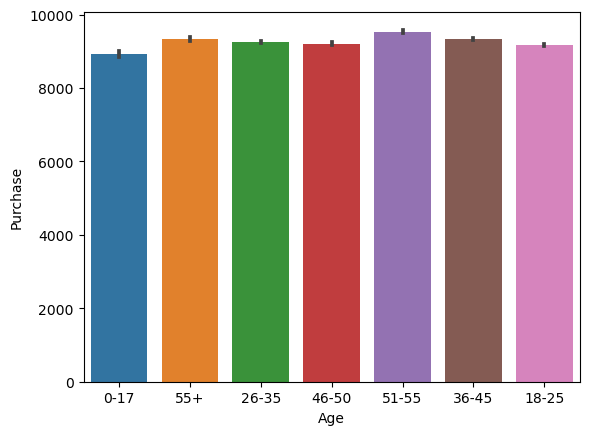

In [34]:
sns.barplot(x='Age',
               y='Purchase',
               data=sale)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

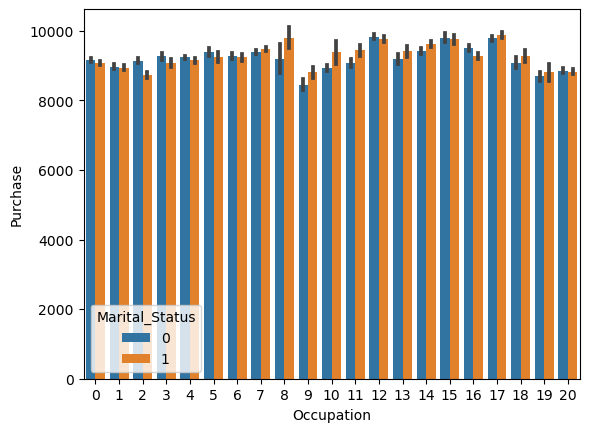

In [38]:
sns.barplot(x='Occupation',y='Purchase',hue='Marital_Status',data=sale)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

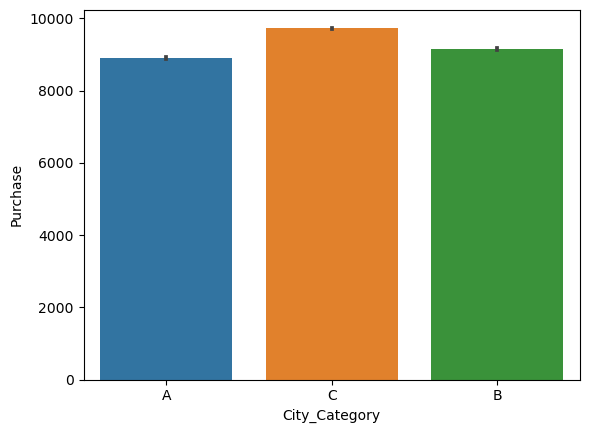

In [41]:
sns.barplot(x='City_Category',y='Purchase',data=sale)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

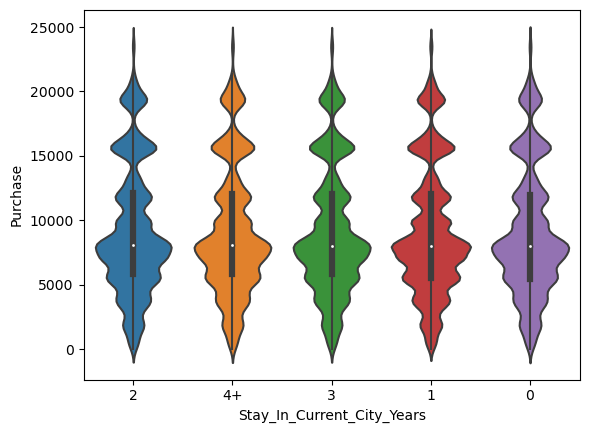

In [43]:
sns.violinplot(x='Stay_In_Current_City_Years',y='Purchase',data=sale)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

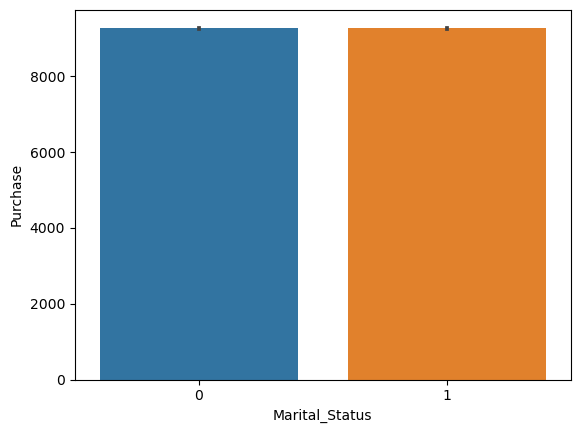

In [47]:
sns.barplot(x='Marital_Status',
               y='Purchase',
               data=sale)

#### PRODUCT CATEGORY1

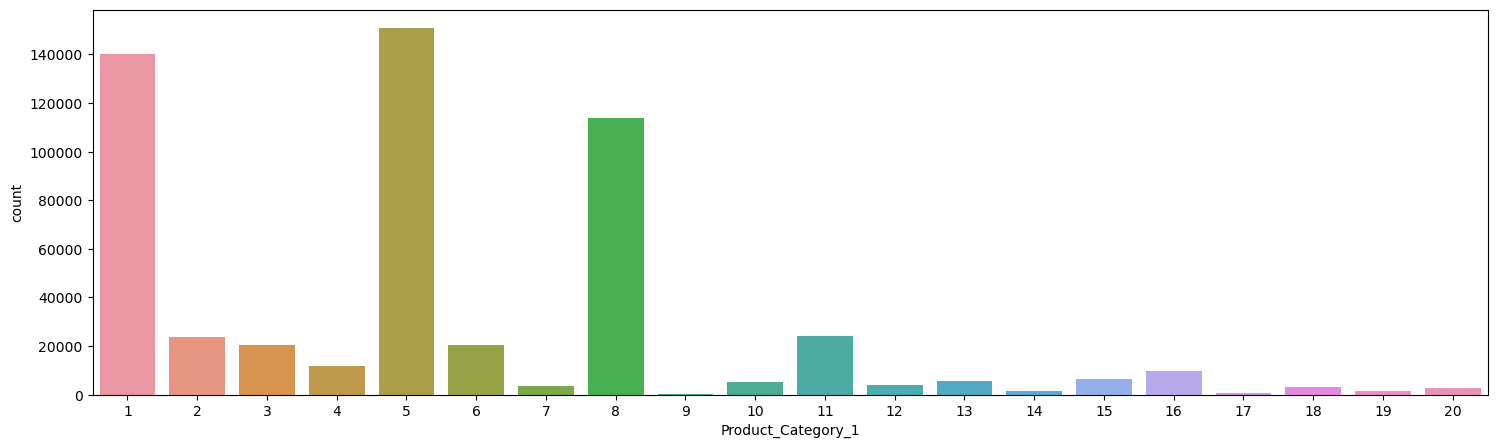

In [48]:
plt.figure(figsize=(18,5))
sns.countplot(sale['Product_Category_1'])
plt.show()

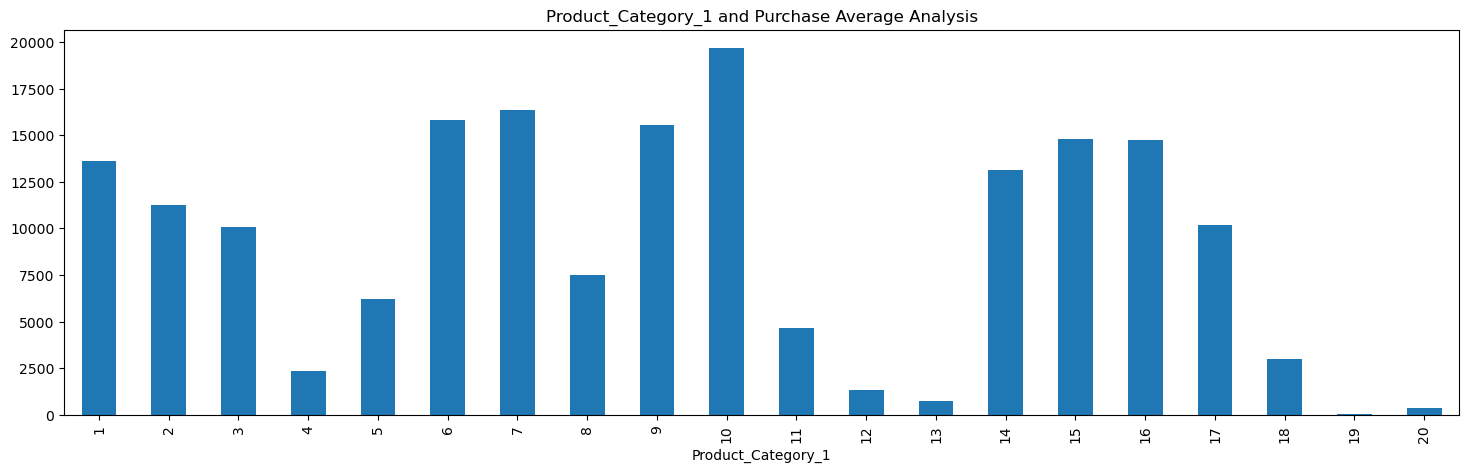

In [49]:
sale.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Average Analysis")
plt.show()

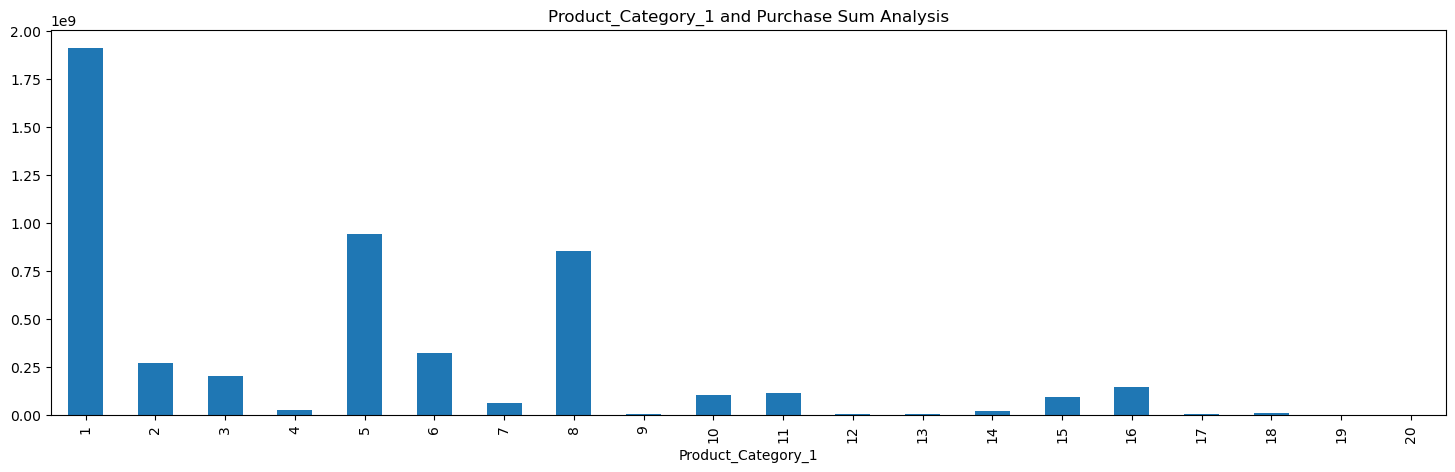

In [50]:
sale.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Sum Analysis")
plt.show()

#### PRODUCT CATEGORY2

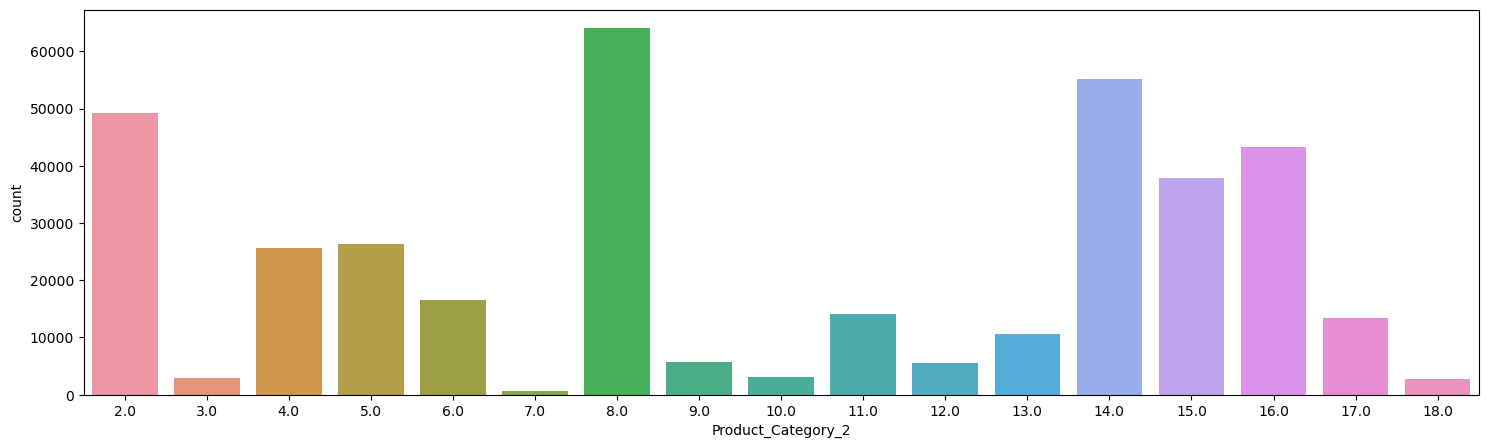

In [58]:
plt.figure(figsize=(18,5))
sns.countplot(sale['Product_Category_2'])
plt.show()

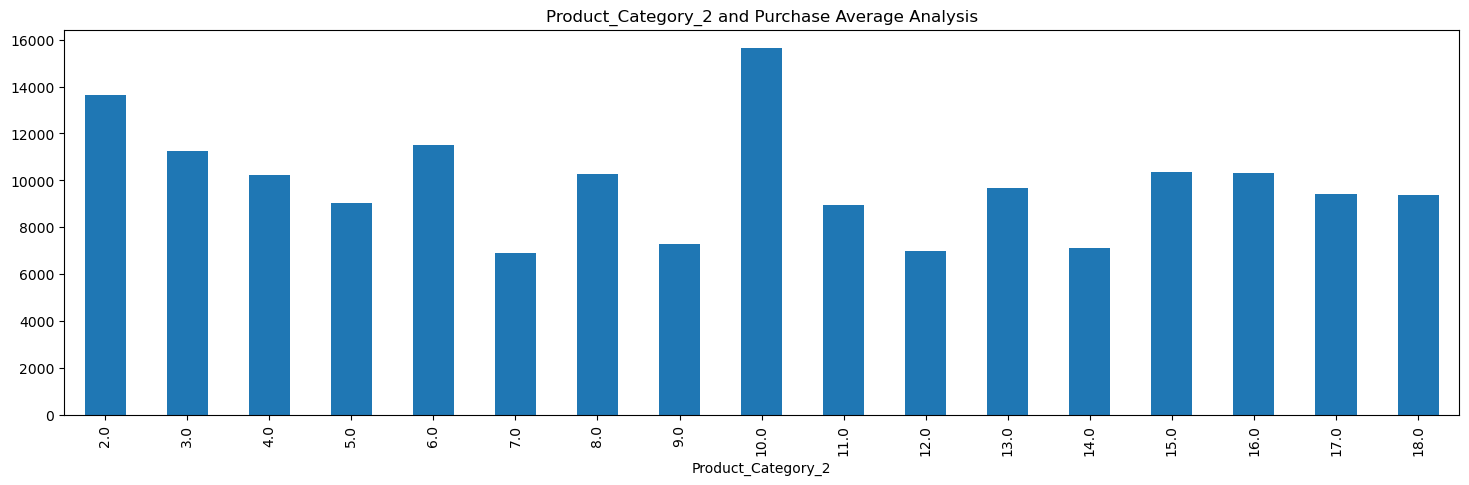

In [56]:
sale.groupby('Product_Category_2').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 and Purchase Average Analysis")
plt.show()

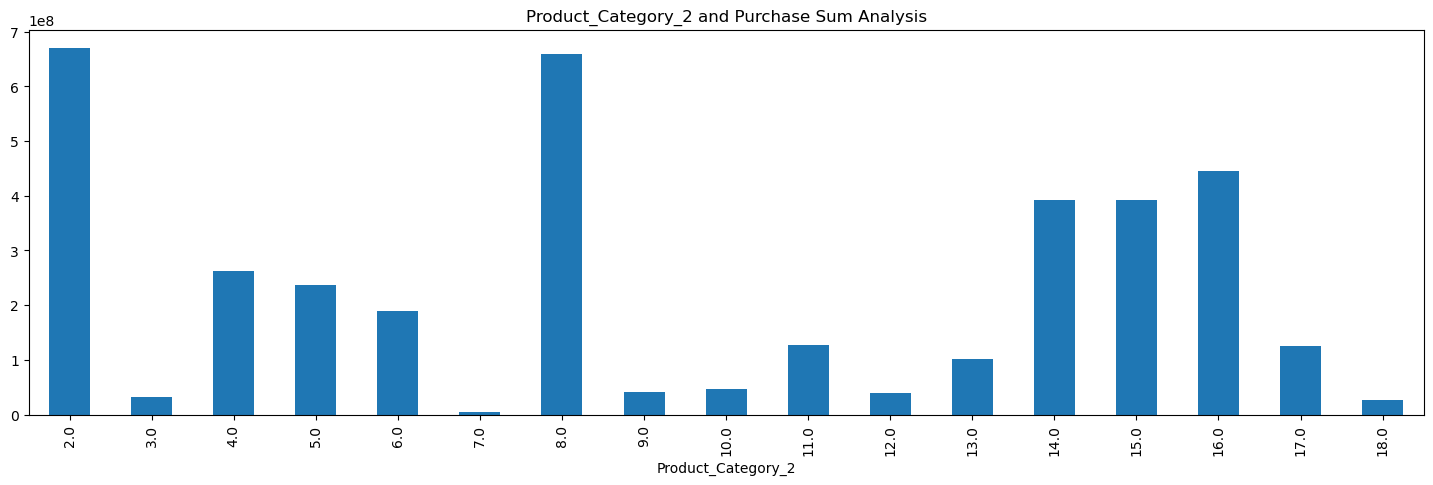

In [57]:
sale.groupby('Product_Category_2').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 and Purchase Sum Analysis")
plt.show()

#### PRODUCT CATEGORY3

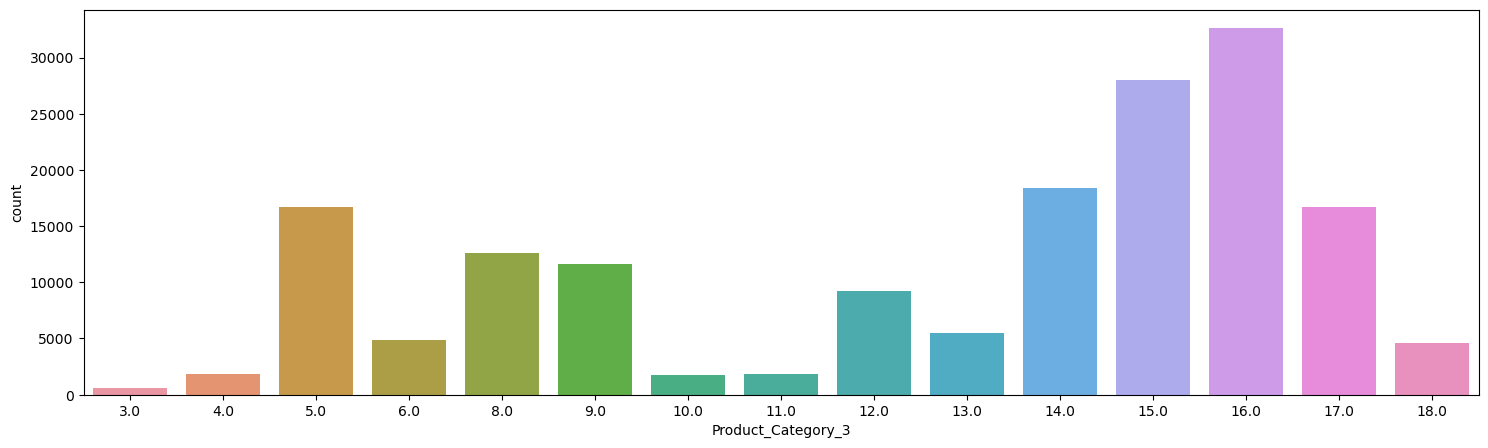

In [59]:
plt.figure(figsize=(18,5))
sns.countplot(sale['Product_Category_3'])
plt.show()

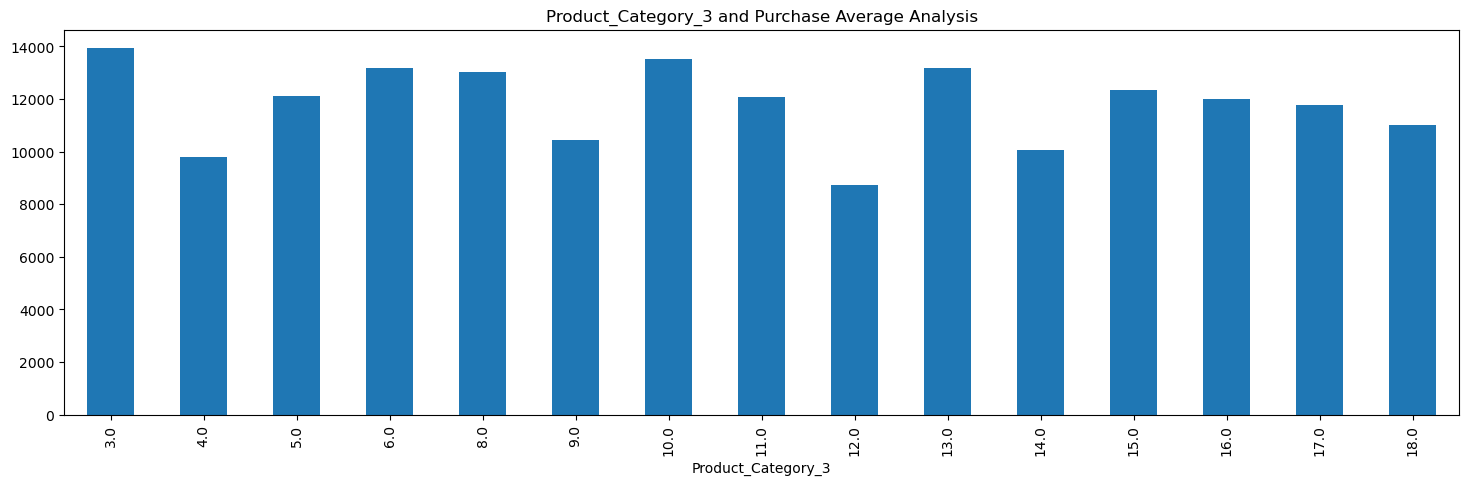

In [60]:
sale.groupby('Product_Category_3').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_3 and Purchase Average Analysis")
plt.show()

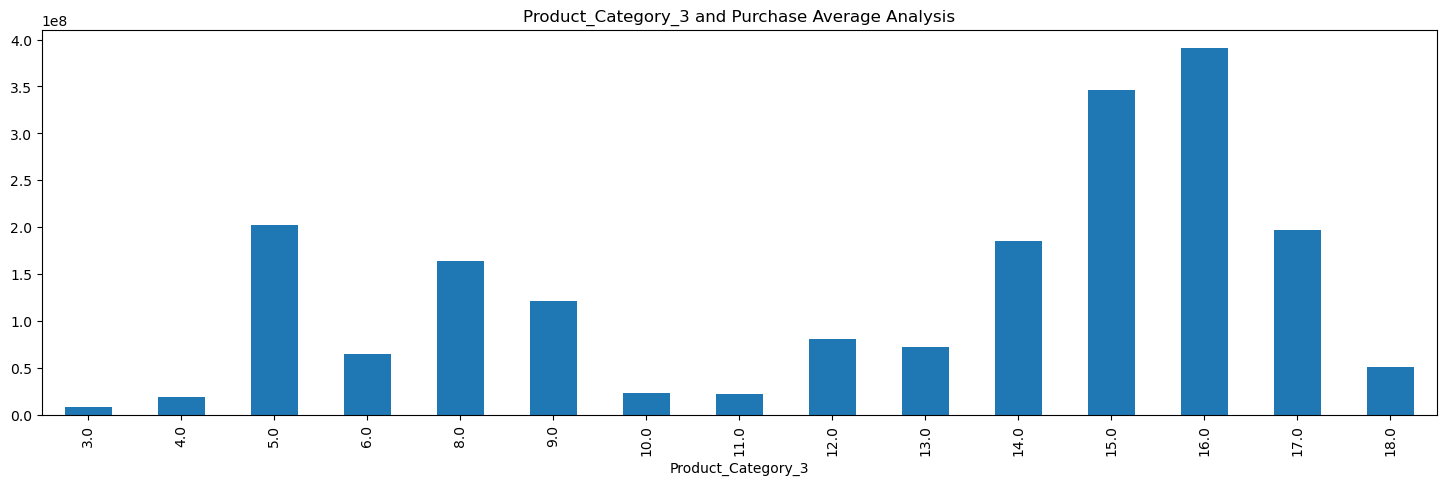

In [61]:
sale.groupby('Product_Category_3').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_3 and Purchase Average Analysis")
plt.show()

#### INSIGHTS:

*  Observe that the purchase amount is repeating for many customers.This may be because on Friday sale many are buying discounted products in large numbers and follows like a Gaussian Distribution.

* Age and Purchase graph also has a uniform distribution.

* we can observe all the categories being purchased in an average manner.



(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'User_ID'),
  Text(1, 0, 'Occupation'),
  Text(2, 0, 'Marital_Status'),
  Text(3, 0, 'Product_Category_1'),
  Text(4, 0, 'Product_Category_2'),
  Text(5, 0, 'Product_Category_3'),
  Text(6, 0, 'Purchase')])

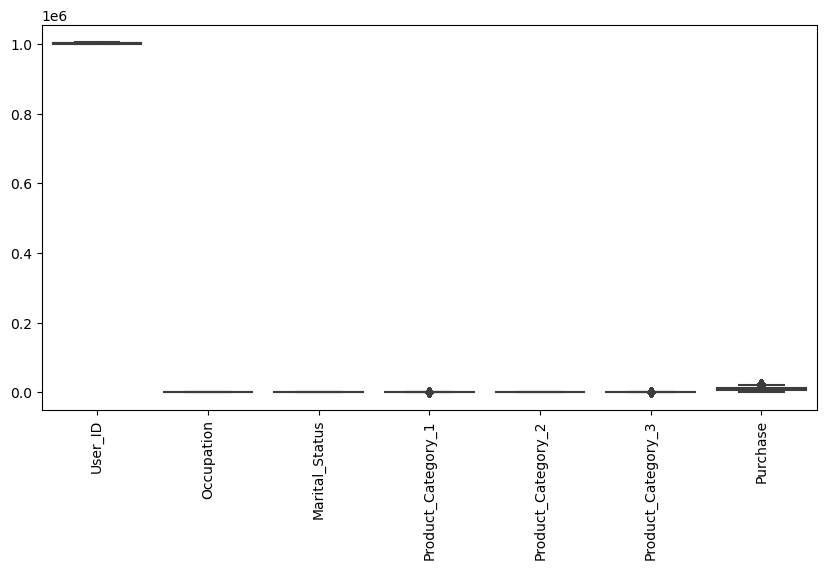

In [7]:
mlp.figure(figsize=(10,5))
p = sns.boxplot(data = sale, orient ='v',width=0.8)
mlp.xticks(rotation=90)

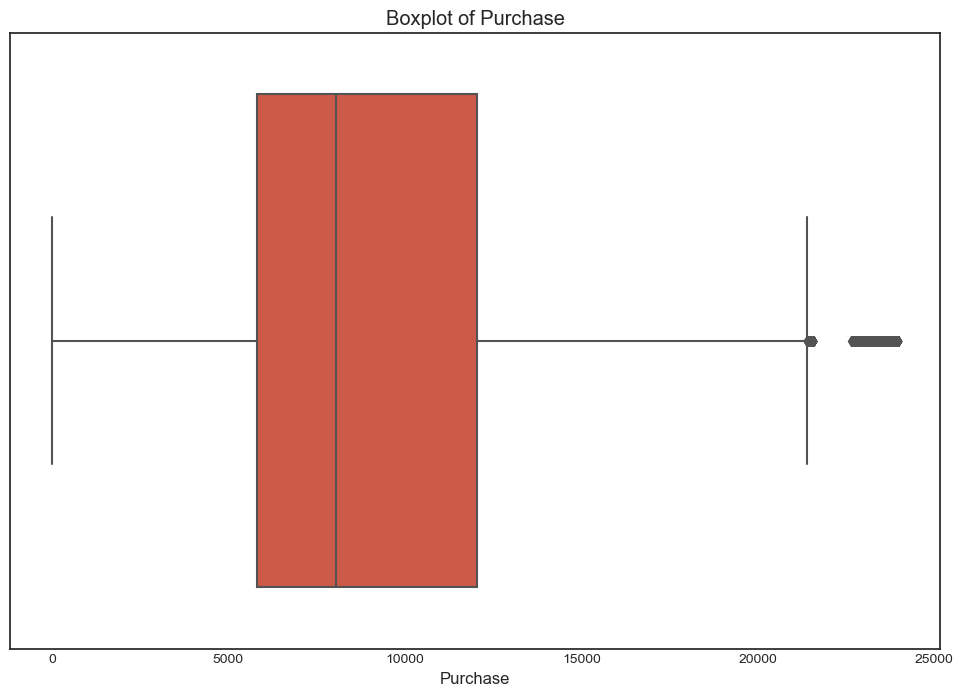

In [94]:
sns.boxplot(sale["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [115]:
sale.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001267,0.001888,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000317,0.007265,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,0.001267,-0.000317,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.001888,0.007265,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


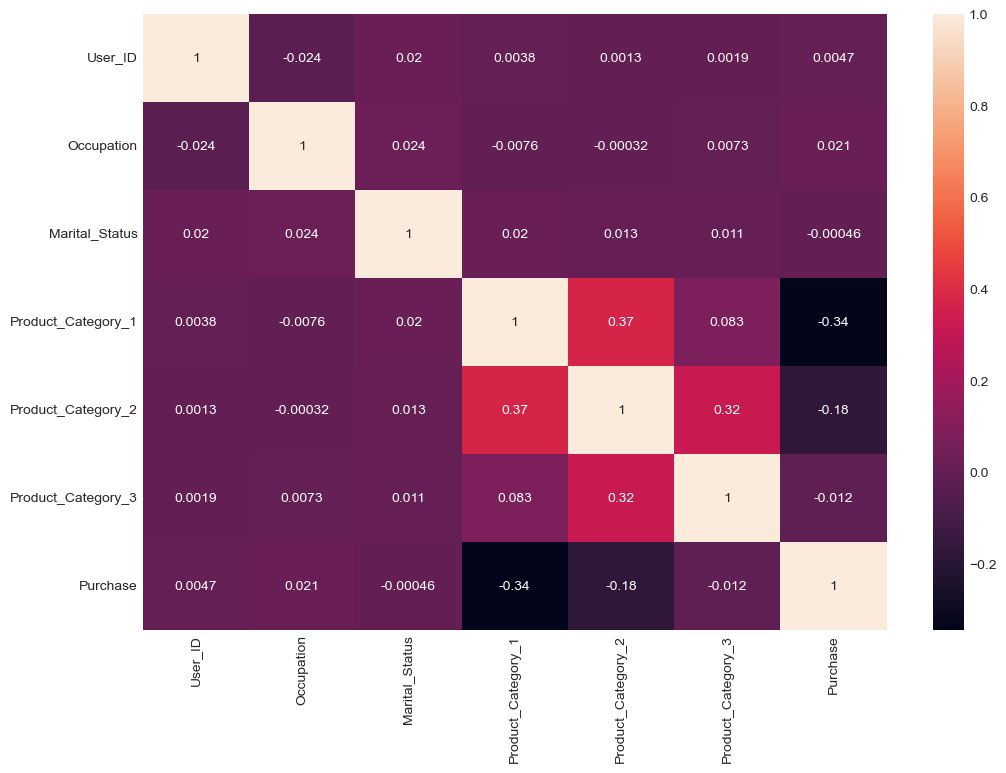

In [116]:
sns.heatmap(sale.corr(),annot=True)
plt.show()

#### INSIGHTS:

* There is a some corellation between the product category groups.

#### DATA MANIPULATION

In [141]:
sale[["Purchase"]].mean()

Purchase    9263.968713
dtype: float64

In [137]:
sale['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [138]:
sale.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [139]:
sale.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [147]:
sale[["Occupation", "Purchase"]].groupby("Occupation").mean()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


In [149]:
p_table = pd.pivot_table(sale, index = ['City_Category'], values = ['Purchase'], aggfunc = 'mean' )
print(p_table)

                  Purchase
City_Category             
A              8911.939216
B              9151.300563
C              9719.920993


In [150]:
p_table = pd.pivot_table(sale, index = ['Stay_In_Current_City_Years'], values = ['Purchase'], aggfunc = 'mean' )
print(p_table)

                               Purchase
Stay_In_Current_City_Years             
0                           9180.075123
1                           9250.145923
2                           9320.429810
3                           9286.904119
4+                          9275.598872


#### FEATURE ENGINEERING

In [8]:
sale_features = sale.copy()

In [9]:
dictionary={'M':0,'F':1}
sale_features['Gender']=sale_features['Gender'].map(dictionary)

In [105]:
sale_features.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,0,55+,16,C,4,0,8,9.842329,12.668243,7969


In [10]:
sale_features['Stay_In_Current_City_Years'] = sale_features['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [11]:
sale_features = pd.get_dummies(sale_features, columns=['Stay_In_Current_City_Years'])

In [12]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [13]:
sale_features['Age'] = lr.fit_transform(sale_features['Age'])

In [14]:
sale_features['City_Category'] = lr.fit_transform(sale_features['City_Category'])

In [111]:
sale_features.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,1,0,10,0,0,3,9.842329,12.668243,8370,0,0,1,0,0
1,1000001,P00248942,1,0,10,0,0,1,6.000000,14.000000,15200,0,0,1,0,0
2,1000001,P00087842,1,0,10,0,0,12,9.842329,12.668243,1422,0,0,1,0,0
3,1000001,P00085442,1,0,10,0,0,12,14.000000,12.668243,1057,0,0,1,0,0
4,1000002,P00285442,0,6,16,2,0,8,9.842329,12.668243,7969,0,0,0,0,1


In [15]:
sale_features.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

#### REMOVE UNWANTED DATA

In [16]:
sale_features = sale_features.drop(["User_ID","Product_ID"],axis=1)

#### SPLITTING TRAIN AND TEST DATA

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = sale_features.drop('Purchase', axis=1)
y = sale_features.Purchase

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)
                                                    

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### MODEL BUILDING

#### LINEAR REGRESSION MODEL

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.13020674105054475

#### DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
dt_y_pred = regressor.predict(X_test)

In [39]:
r2_score(y_test, dt_y_pred)

0.5538231294329483

#### RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(random_state = 42)  
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
rf_y_pred = RFregressor.predict(X_test)

In [31]:
r2_score(y_test, rf_y_pred)

0.6326772707731715

#### XGB REGRESSOR

In [33]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
xgb_y_pred = xgb_reg.predict(X_test)

In [35]:
r2_score(y_test, xgb_y_pred)

0.6722006646527863